# Test 3

## Question 1

/tmp/ipykernel_77068/2229995350.py:29: RuntimeWarning: overflow encountered in scalar add
  new_v = v + (h/ 6.0) * (k1v + 2 * k2v + 2 * k3v + k4v)
/tmp/ipykernel_77068/2229995350.py:18: RuntimeWarning: invalid value encountered in scalar subtract
  return -64*x - 0.1*v + np.sin(freq*t)
/tmp/ipykernel_77068/2229995350.py:25: RuntimeWarning: invalid value encountered in scalar add
  k3v = acc(x + 0.5 * h * k2x, v + 0.5 * h * k2v, t + 0.5 * h, freq)


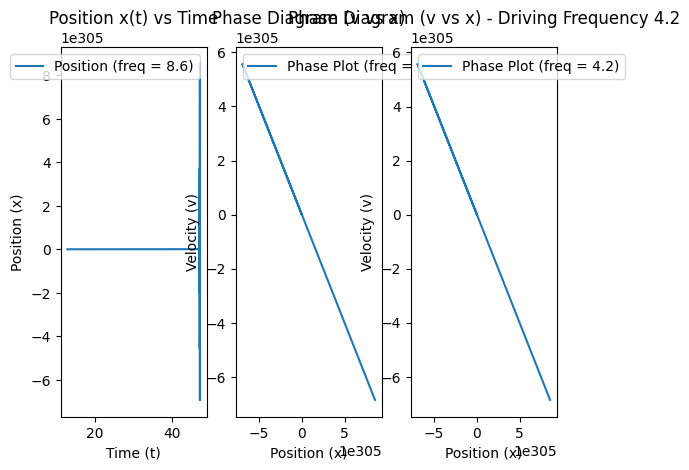

/home/jtedwards/Ubuntu_Code/Projects/comp_phys/.conda/lib/python3.11/site-packages/mpl_toolkits/mplot3d/proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


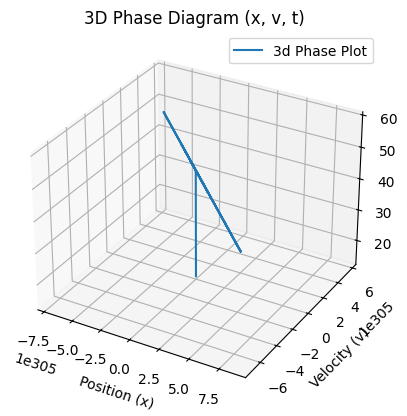

In [5]:
#Equation
# dv/dt= -64x-0.1v+sin(8.6t)
# dx/dt = v
# t = 13, x(13) = -0.75, v(13)= -1.2
# from t = 13 to t = 60
import matplotlib.pyplot as plt
import numpy as np 

v0 = -1.2
t0 = 13
tfinal = 60
x0 = -0.75
v0 = -1.2
frequency = 8.6
h =0.01

def acc(x,v,t,freq=8.6):
    return -64*x - 0.1*v + np.sin(freq*t)

def rk4(x,v,t,h,freq=8.6):
    k1v = acc(x,v,t,freq)
    k1x = v
    k2v = acc(x+0.5 * h *k1x, v + 0.5 * h * k1v, t + 0.5, freq)*h
    k2x = v + 0.5 * h * k1v
    k3v = acc(x + 0.5 * h * k2x, v + 0.5 * h * k2v, t + 0.5 * h, freq)
    k3x = v + 0.5 * h * k2v
    k4v = acc(x + h * k3x, v + h * k3v, t + h, freq)
    k4x = v + h * k3v
    new_v = v + (h/ 6.0) * (k1v + 2 * k2v + 2 * k3v + k4v)
    new_x = x + (h/6.0) * ( k1x + 2 * k2x + 2 * k3x + k4x)
    return new_v, new_x

def timefunc(t0, tfinal, x0, v0, h, freq=8.6):
    times = np.arange(t0, tfinal, h)
    xvals = [x0]
    vvals = [v0]
    x = x0
    v = v0 
    
    for t in times[1:]:
        xvals.append(x)
        vvals.append(v)
        x,v = rk4(x,v,t,h,freq)
    return times, np.array(xvals), np.array(vvals)

times, xvals, vvals = timefunc(t0, tfinal, x0, v0, h)
plt.subplot(1,3,1)
plt.plot(times, xvals, label=f'Position (freq = {frequency})')
plt.title("Position x(t) vs Time")
plt.xlabel("Time (t)")
plt.ylabel("Position (x)")
plt.legend()

plt.subplot(1,3,2)
plt.plot(xvals, vvals, label=f'Phase Plot (freq = {frequency})')
plt.title("Phase Diagram (v vs x)")
plt.xlabel("Position (x)")
plt.ylabel("Velocity (v)")
plt.legend()



frequency2 = 4.2
times2, xvals2, vvals2 = timefunc(t0, tfinal, x0, v0, h, frequency2)

plt.subplot(1,3,3)
plt.plot(xvals2, vvals2, label=f'Phase Plot (freq = {frequency2})')
plt.title(f"Phase Diagram (v vs x) - Driving Frequency {frequency2}")
plt.xlabel("Position (x)")
plt.ylabel("Velocity (v)")
plt.legend()

plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xvals, vvals, times, label='3d Phase Plot')
ax.set_title("3D Phase Diagram (x, v, t)")
ax.set_xlabel("Position (x)")
ax.set_ylabel("Velocity (v)")
ax.set_zlabel("Time (t)")
ax.legend()
plt.show()

## Question 2

In [ ]:
Web VPython 3.2

#define constants
G = 6.67E-11 #gravitational constant
AU = 1.5E11 #Earth-Sun distance
YEAR = 365.25*24*60*60 #a year in seconds
RE = 6.378E6
ME = 5.97E24
#create objects for the Sun and planet
def satcalc(initial_velocity):
    omega = sqrt(G*5.97E22/(6.6*RE))/(6.6*RE)
    sun = sphere(pos = vec(0,0,0), radius = 1E10, mass = ME, rotation=omega, texture =textures.earth)
    earth = sphere(pos = vec(RE*1.1,0,0), radius = sun.radius/10, mass = 1E4, color =color.yellow)
    #initial conditions
    r = mag(earth.pos -sun.pos)
    earth.vel = vec(0,initial_velocity,0)
    #earth.acc = vec(-G*sun.mass/RE**2,0,0)
    earth.trail = curve(pos = earth.pos, color = color.blue)
    L = vector(0,0,0) # angular momentum of the Earth
    counter = 0
    rmin = 1.1*RE
    rmax = 1.1*RE
    prevr = mag(earth.pos-sun.pos)
    #time step
    h = 1E4
    scene.autoscale = True
    #define acceleration function
    def acc(earthpos):
        r = mag(earth.pos - sun.pos)
        return -G*sun.mass*(earthpos - sun.pos)/r**3
        #define RK4 algorithm
    def rk4(earth):
        k1v = acc(earth.pos)*h
        k1x = earth.vel*h
        k2v = acc(earth.pos + 0.5*k1x)*h
        k2x = (earth.vel + 0.5*k1v)*h
        k3v = acc(earth.pos + 0.5*k2x)*h
        k3x = (earth.vel + 0.5*k2v)*h
        k4v = acc(earth.pos + k3x)*h
        k4x = (earth.vel + k3v)*h
        earth.vel = earth.vel + (k1v + 2*k2v + 2*k3v + k4v)/6.0
        earth.pos = earth.pos + (k1x + 2*k2x + 2*k3x + k4x)/6.0
    #animate the solution
    #while True: #loop through calculations to animate
    #DETERMINE rmin and rmax to calculate a, the semimajor axis
    r = mag(earth.pos - sun.pos)
#    if r < rmin:
#        rmin = r
##        if r < prevr:
##            boost = 1.01
##    #        retroboost = 0.99
##            earth.vel = earth.vel * boost
#    if r > rmax:
#        rmax = r
    rmin = min(r, rmin)
    rmax = min(r, rmax)
    
    a = (rmin + rmax)/2
    P = sqrt(4*pi*pi*a**3/(G*(sun.mass + earth.mass)))/YEAR #orbital period
    L = earth.mass*cross(earth.pos, earth.vel)
    #caclulate total energy
    E = 0.5*earth.mass*mag2(earth.vel) - G*sun.mass*earth.mass/r
    ecc = sqrt(1 + 2*mag2(L)*E/((G*ME)**2*earth.mass**3))
    rk4(earth)
    #draw the path of the Earth
    earth.trail.append(pos = earth.pos, color=earth.color)
    #print values every 1000calculations
    return {
        'rmin' : rmin,
        'eccentricity': ecc,
        'period': P,
        'angular_momentum': mag(L),
        'energy': E
        }
#    if counter >=100:
#        print(f'Perigree rmin = {rmin:8.3E} m')
#        print('Mag of Ang Mom = {0:8.3E}, Energy = {1:8.3f}, Ecc ={2:8.3f}, Period = {3:8.3f}'.format(mag(L),E, ecc, P))
#        counter = 0
#    counter = counter + 1
#    rate(200)
        
firstvel = 1*1 * sqrt(G*ME/RE*1.1)
firstcalc = print(f'original vel = {satcalc(firstvel)}')

boostedvel = 1.01*firstvel
boostedcalc = print(f'boosted = {satcalc(boostedvel)}')

retroboosted = 0.99*firstvel
retroboostedcalc = print(f'retroboosted = {satcalc(retroboosted)}')


## Question 3
### A. 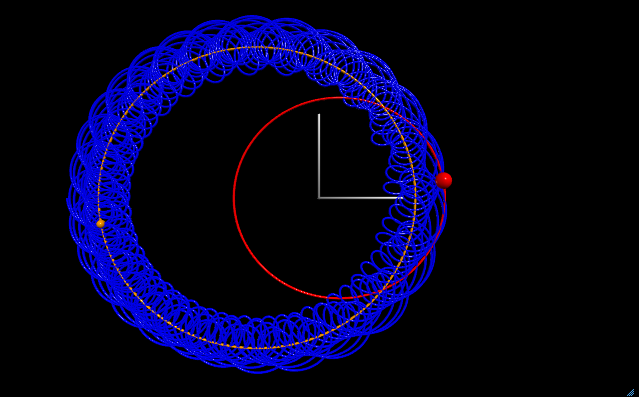
### B 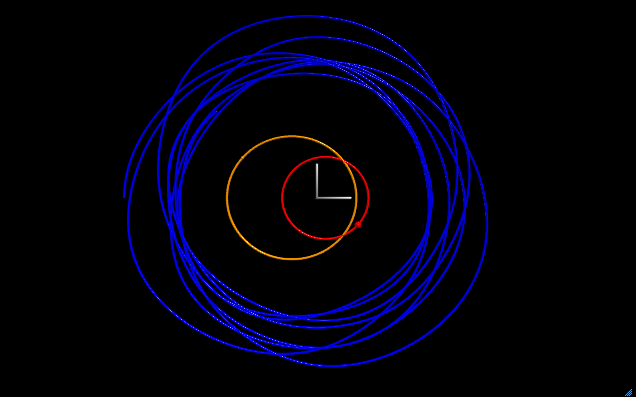
### C. 
#### 1. The Semi Major Axes don't remain constant and shift whenever the mass changes 
#### 2. Yes there is an imaginary line between the two starts that they always pass through. The orbit doesn't  move to another line 
#### 3. The orbit of Star A moves towards Star B and the masses chnages which as well changes the gravitational forces acting on the planets


In [ ]:
Web VPython 3.2
G = 6.67E-11 #gravitational constant
AU = 1.5E11 #planet-sun distance
YEAR = 365.25 * 24 * 60 * 60 #year in seconds
Ms = 2E30 #Mass of sun
F = 0.001
#create objects for the two stars and a planet
starA = sphere(pos = vec(2*AU,0,0), radius = 2E10, mass = 1.5*Ms, color =color.red)
starB = sphere(pos = vec(-3.5*AU, 0, 0), radius = 1E10, mass = 1*Ms,color = color.orange)
planet = sphere(pos = vec((-3.5*AU) - (0.5*AU), 0, 0), radius = 1E9, mass = 6E24, color= color.blue)
#draw axes for reference
d = 2E11 # length of an axis
xaxis = curve(pos = vector(0, 0, 0), vector(d, 0, 0), color =vector(0.5, 0.5, 0.5))
yaxis = curve(pos = vector(0, 0, 0), vector(0, d, 0), color =vector(0.5, 0.5, 0.5))
zaxis = curve(pos = vector(0, 0, 0), vector(0, 0, d), color =vector(0.5, 0.5, 0.5))
#initial conditions
planet.vel = vec(0,-sqrt(G* starB.mass/(0.5*AU)), 0)
planet.trail = curve(pos = planet.pos, color = planet.color)
varrow = arrow(pos = planet.pos, axis = planet.vel, length = 7E9, color= planet.color)
starA.vel = vector(0,0.2*sqrt(G*((starA.mass + starB.mass)*(1 + F))/(2*AU)), 0)
starB.vel = -starA.mass/starB.mass*starA.vel
starA.trail = curve(pos = starA.pos, color = starA.color)
starB.trail = curve(pos = starB.pos, color = starB.color)
#time step
h = 1E5
scene.autoscale = 1
#animate the solution
while True: #loop through calculations to animate
    r = mag(starA.pos - starB.pos)
    starA.vel = starA.vel + -G * starB.mass*(starA.pos -
    starB.pos)/r**3*h
    starB.vel = starB.vel + -G * starA.mass*(starB.pos -
    starA.pos)/r**3*h
    starA.pos = starA.pos + starA.vel*h
    starB.pos = starB.pos + starB.vel*h
    planet.vel = planet.vel + (-G*starA.mass*(planet.pos -
    starA.pos)/mag(planet.pos - starA.pos)**3 \
    -G*starB.mass*(planet.pos -
    starB.pos)/mag(planet.pos - starB.pos)**3)*h
    planet.pos = planet.pos + planet.vel*h
    starA.mass = (1-0.0001)*starA.mass
    starB.mass = starB.mass + 0.0001*starA.mass
    #draw the path of the planet
    planet.trail.append(pos = planet.pos, color = planet.color)
    starA.trail.append(pos = starA.pos)
    starB.trail.append(pos = starB.pos)
    rate(800)
    
    

## Question 4
### A. The Equation for x = Earth radius x cos (pi/3) and y = Earth radius x sin(pi/3)
### C. It is a closed Orbit and the orbit is stable. It is not a perfect circlure but it is close
### D. Some of the asteroids dont stay in orbit becuase of the varying velocities

In [ ]:
Web VPython 3.2
# VPython 3.2
# Constants
G = 6.67E-11  # gravitational constant
AU = 1.5E11   # Earth-Sun distance
YEAR = 365.25*24*60*60  # a year in seconds
RE = 6.378E6  # Radius of Earth
ME = 5.97E24  # Mass of Earth
MS = 1.989E30 # Mass of Sun

# Scene setup
scene = canvas(width=1200, height=800, background=color.white)

# Earth's orbit
earth_radius = AU
earth = sphere(pos=vec(earth_radius, 0, 0), radius=RE*5, color=color.blue, make_trail=True)

# Calculate Earth's orbital velocity
earth_velocity = sqrt(G*MS/earth_radius)
earth.vel = vec(0, earth_velocity, 0)

# Sun
sun = sphere(pos=vec(0,0,0), radius=6.96E10, mass=MS, color=color.yellow)

# L4 Lagrange point calculation (60 degrees ahead)
L4_x = earth_radius * cos(pi/3)
L4_y = earth_radius * sin(pi/3)
L4 = sphere(pos=vec(L4_x, L4_y, 0), radius=RE*2, color=color.white, make_trail=True)

# L5 Lagrange point calculation (60 degrees behind)
L5_x = earth_radius * cos(-pi/3)
L5_y = earth_radius * sin(-pi/3)
L5 = sphere(pos=vec(L5_x, L5_y, 0), radius=RE*2, color=color.green, make_trail=True)

# Circular orbit velocity at Lagrange points
v = earth_velocity

# Asteroids for L4
L4_asteroids = []
for _ in range(5):
    asteroid = sphere(pos=1.0004*L4.pos, radius=RE/2, color=color.red, make_trail=True)
    asteroid.vel = vector(-v*(1 + 0.00004*random())*cos(pi/6.2), 
                          v*(1 + 0.00004*random())*sin(pi/6.2), 0)
    L4_asteroids.append(asteroid)

# Asteroids for L5
L5_asteroids = []
for _ in range(5):
    asteroid = sphere(pos=1.0004*L5.pos, radius=RE/2, color=color.purple, make_trail=True)
    asteroid.vel = vector(-v*(1 + 0.00004*random())*cos(-pi/6.2), 
                          v*(1 + 0.00004*random())*sin(-pi/6.2), 0)
    L5_asteroids.append(asteroid)

# Tracking asteroid relative motion for L4 and L5
scene2 = canvas(x=0, y=600, width=1200, height=400, title='Asteroid Relative Motion')
L4_relative_trail = curve(color=color.red)
L5_relative_trail = curve(color=color.purple)

# Simulation parameters
h = 1E5  # Smaller time step
t = 0
orbits_tracked = 0
max_orbits = 10

# Main simulation loop
while True:
    rate(200)
    
    # Update Earth
    earth.vel += (-G*MS*(earth.pos)/mag(earth.pos)**3)*h
    earth.pos += earth.vel*h
    
    # Update Lagrange points (follow Earth's motion)
    L4.pos = vec(earth.pos.x * cos(pi/3), earth.pos.x * sin(pi/3), 0)
    L5.pos = vec(earth.pos.x * cos(-pi/3), earth.pos.x * sin(-pi/3), 0)
    
    # Process L4 asteroids
    for asteroid in L4_asteroids:
        r_sun = asteroid.pos - sun.pos
        r_earth = asteroid.pos - earth.pos
        
        asteroid.vel += (-G*MS*r_sun/mag(r_sun)**3 - G*ME*r_earth/mag(r_earth)**3)*h
        asteroid.pos += asteroid.vel*h
        
        # Track relative motion
        relative_pos = (asteroid.pos - L4.pos) / mag(L4.pos)
        L4_relative_trail.append(pos=vec(relative_pos.x, relative_pos.y, 0))
    
    # Process L5 asteroids
    for asteroid in L5_asteroids:
        r_sun = asteroid.pos - sun.pos
        r_earth = asteroid.pos - earth.pos
        
        asteroid.vel += (-G*MS*r_sun/mag(r_sun)**3 - G*ME*r_earth/mag(r_earth)**3)*h
        asteroid.pos += asteroid.vel*h
        
        # Track relative motion
        relative_pos = (asteroid.pos - L5.pos) / mag(L5.pos)
        L5_relative_trail.append(pos=vec(relative_pos.x, relative_pos.y, 0))
    
    t += h
    
    # Optional orbit tracking
    if t > YEAR:
        orbits_tracked += 1
        t = 0
        if orbits_tracked >= max_orbits:
            break

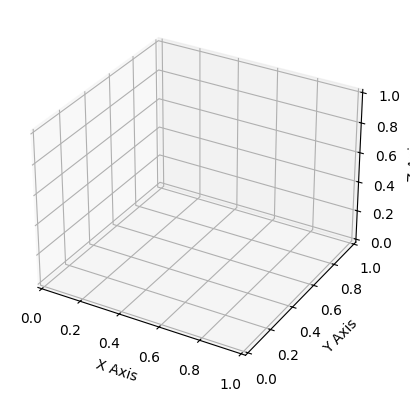

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

#Lorenz system
def lorenz(x,y,z,s=10, r=28, b=2.667):
    x_dot = s*(y-x)
    y_dot = r*x -y - x*z
    z_dot = x * y - b * z 
    
    return x_dot, y_dot, z_dot

#time step
h = 0.01

stepCnt = 10000
xs = np.empty((stepCnt+1,))
ys = np.empty((stepCnt+1,))
zs = np.empty((stepCnt+1,))

# initial values
xs[0],ys[0],zs[0] = (0, 1.0, 1.05)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot(xs,ys,zs)
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')

for i in np.arange(stepCnt):
    #derivative
    x_dot,y_dot,z_dot = lorenz(xs[i],ys[i],zs[i])
    #Euler
    xs[i+1] = xs[i] + x_dot*h
    ys[i+1] = ys[i] + y_dot*h
    zs[i+1] = zs[i] + z_dot*h
    